# Importing Libraries

In [1]:
import keras
import PIL

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.layers import Activation

Using TensorFlow backend.


# Defining Model Initializer Fuction

In [2]:
def model_builder():
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), padding='same', strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3,3), padding='same', strides=1, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.summary()
    
    return model

In [3]:
model = model_builder()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

# Compiling The Model

In [4]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Defining Callbacks

In [5]:
from keras.callbacks import ReduceLROnPlateau

LR_Reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=1,
                                 verbose=1,
                                 factor=0.7,
                                 min_lr=0.0001)

callbacks = [LR_Reduction]

# Reading Dataset

In [6]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255)

testing_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
training_set = training_datagen.flow_from_directory('Dataset/training/',
                                                    target_size=(28,28),
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 60000 images belonging to 10 classes.


In [8]:
testing_set = testing_datagen.flow_from_directory('Dataset/testing/',
                                                    target_size=(28,28),
                                                    color_mode='grayscale',
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 10000 images belonging to 10 classes.


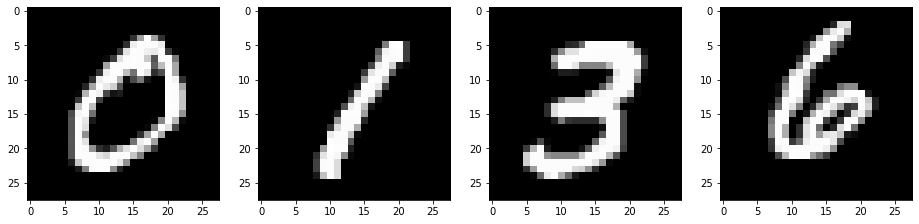

In [3]:
import cv2
from matplotlib import pyplot as plt

image1 = cv2.imread('Dataset/training/0/1.png')
image2 = cv2.imread('Dataset/training/1/3.png')
image3 = cv2.imread('Dataset/training/3/7.png')
image4 = cv2.imread('Dataset/training/6/13.png')

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)

ax1.imshow(image1)
ax2.imshow(image2)
ax3.imshow(image3)
ax4.imshow(image4)

plt.show()

# Training The Model

In [9]:
FAST_RUN = False
epochs=3 if FAST_RUN else 10

In [10]:
history = model.fit_generator(training_set,
                             steps_per_epoch=60000//32,
                             epochs=epochs,
                             validation_data=testing_set,
                             validation_steps=10000//32,
                             callbacks=callbacks)

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2850 - accuracy: 0.9136 - val_loss: 0.0717 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0936 - accuracy: 0.9722 - val_loss: 0.0810 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0729 - accuracy: 0.9788 - val_loss: 0.0032 - val_accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.0612 - accuracy: 0.9822 - val_loss: 0.0259 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0549 - accuracy: 0.9835 - val_loss: 0.0801 - val_accuracy: 0.9903

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0052 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [=====================

# Visualizing Learning of Model

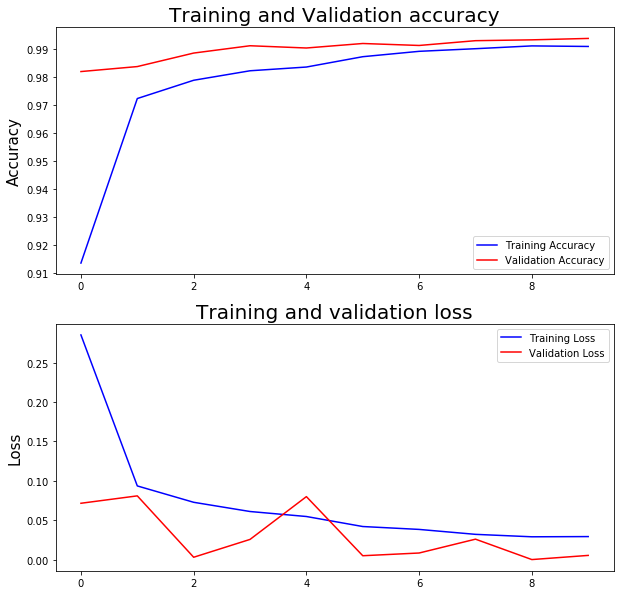

In [11]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()

ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()

plt.show()

In [12]:
print("Accuracy Score:" , round(accuracy[-1]*100))

Accuracy Score: 99.0


In [13]:
model.save('MODEL')